# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

<span style="color:red">Q1: 45 Q2: 42 Total: 87</span>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [154]:
# I worked with Sam Ryan

# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split, KFold
from sklearn import linear_model, decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [155]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [156]:
print("X data: ")
print(X.describe())
print("\ny data:")
print(y)

X data: 
               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002144     0.006710     0.001454     0.002285   
std       0.030224     0.020707     0.034655     0.023100     0.021627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003945     0.003125     0.000920     0.008367     0.001806   
std       0.030010     0.026981     0.016265     0.043932     0.025845   
min       0.000000     0.000

The X dataframe contains the 1000 most frequent words that are in greater than 2 documents, less than half of all documents, and that are not stop words as columns. This is a bag-of-words representation, consisting of 2845 emails. The instance of a word in an email is a weight that represents the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus.

The y numpy array represents the actual newsgroup of each document: alt.atheism, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, rec.sport.baseball, or rec.sport.hockey.

<span style="color:red">The features are quite sparse. </span>

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [157]:
kmeans = KMeans(n_clusters=5, random_state=1337)  
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1337, tol=0.0001,
    verbose=0)

<span style="color:red">Good. </span>

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [158]:
# print the mean of the euclidean distances of all the data points 
# from the mean data point (in the whole dataset)
distance = np.mean(np.linalg.norm(X-X.mean(), axis=1))
print("Mean Euclidean Distance: {}".format(distance))

# print the inertia and adjusted rand index of the model
print("Inertia: {}".format(kmeans.inertia_))
print("Adjusted rand score: {}".format(adjusted_rand_score(y, kmeans.labels_)))

Mean Euclidean Distance: 0.954581397358
Inertia: 2593.17430766
Adjusted rand score: 0.216104350793


1. Define what the inertia and adjusted rand score are (one or two sentences)
    * The inertia is the sum of distances of samples to their closest cluster center. The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

2. Comment on the quality of the clustering implied by the adjusted rand score and inertia
    * Perfectly maching labelings have a score of 1 even, and our score is .22, which is considerably low. Since there are 5 categories, if we randomly assigned a category to each email, we'd expect an accuracy of about .2, which is the same as our adjusted rand score. So, our classifier did pretty poorly. This means that class members are completely split across different clusters, and the assignment is relatively incomplete, hence the ARI is very low. The inertia is pretty high, this means that the distances of samples to their closest cluster center are also high. This means that the clusters are pretty spread out, given that even the closest point to the center of the cluster has a large distance.


<span style="color:red">Good. </span>

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [159]:
# the number of datapoints with each label
print("Number of Datapoints per Label:\n")
print(pd.value_counts(y))

# the number of datapoints assigned to each cluster
print("\n\nNumber of Datapoints per Cluster:\n")
print(pd.value_counts(kmeans.labels_))


Number of Datapoints per Label:

rec.sport.hockey            600
rec.sport.baseball          597
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
alt.atheism                 480
dtype: int64


Number of Datapoints per Cluster:

0    1050
2     649
1     570
4     343
3     233
dtype: int64


Between the 5 different labels the datapoints seem to pretty evenly split, but the distibution among the cluster does not appear to be the same. Ideally we'd like a cluster for each label, containing the exact same number of points, but this isn't what happened. Cluster 0 seemed to dominate the dataset, claiming the most datapoints by over 400. Clusters 3 and 4 seemed to suffer claiming less than 600 datapoints between them. Given the uneven distribution of the datapoints over the 5 clusters, it makes sense that our adjusted rand score was so low. This kmeans is a poor representation our our data.

<span style="color:red">Good. </span>

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [160]:
dist_centers = np.zeros([5,5])
centers = kmeans.cluster_centers_
for i in range(5):
    for j in range(5):
        dist_centers[i][j] = np.linalg.norm(centers[i]-centers[j])

dist_centers

array([[ 0.        ,  0.19481871,  0.20336322,  0.33095496,  0.22738455],
       [ 0.19481871,  0.        ,  0.29223799,  0.32040898,  0.29210539],
       [ 0.20336322,  0.29223799,  0.        ,  0.39748207,  0.28369637],
       [ 0.33095496,  0.32040898,  0.39748207,  0.        ,  0.39922129],
       [ 0.22738455,  0.29210539,  0.28369637,  0.39922129,  0.        ]])

<span style="color:red">Good. </span>

### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

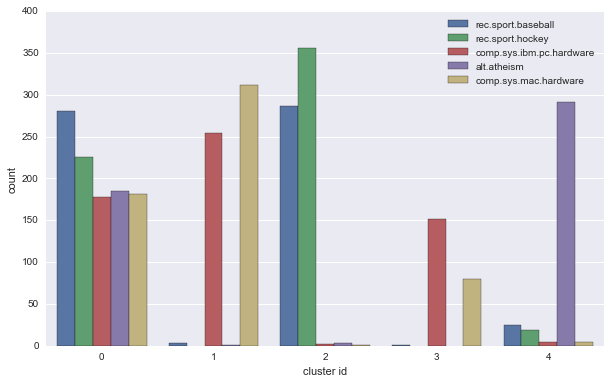

In [161]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()

There's only one cluster that contains 1 main type of element: cluster 4 contains mostly alt.atheism. Cluster 0 contains almost all types of labels evenly, and Cluster 3 hardly contains any elements and only comp.sys.ibm.pc.hardware or comp.sys.mac.hardware. It makes sense for those two labels to be confused, but this cluster has significantly less datapoints than the rest, only 233. Given the wide distribution of data, I'd say this explains the low adjusted rand score (.2). This is a pretty poor fit!

<span style="color:red">Good. </span>

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better


PCA Components: 1
Inertia: 2.82109066477 Rand Score: 0.209466028491

PCA Components: 2
Inertia: 10.592280453 Rand Score: 0.268079336483

PCA Components: 3
Inertia: 20.4235331658 Rand Score: 0.239479218068

PCA Components: 5
Inertia: 49.8674692394 Rand Score: 0.2288985833

PCA Components: 10
Inertia: 118.178301295 Rand Score: 0.213854607491

PCA Components: 20
Inertia: 231.905790868 Rand Score: 0.209500299493

PCA Components: 50
Inertia: 492.377897319 Rand Score: 0.207798369276

PCA Components: 100
Inertia: 820.096306441 Rand Score: 0.225048950168

PCA Components: 500
Inertia: 2145.62769513 Rand Score: 0.205869464934

PCA Components: 1000
Inertia: 2593.16646207 Rand Score: 0.231640388002


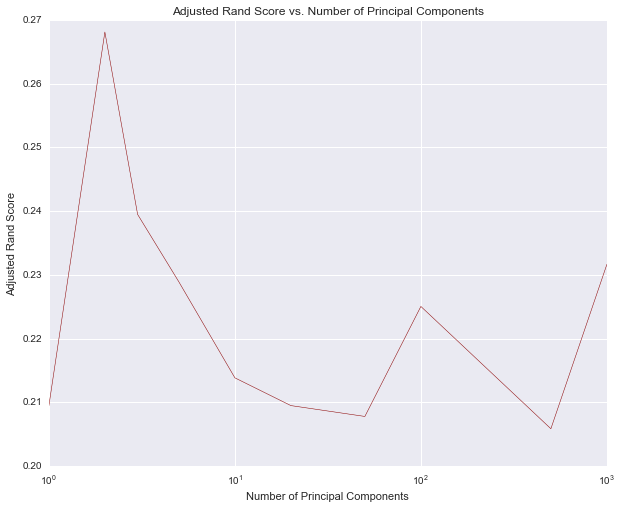

In [162]:
n_components = [1,2,3,5,10,20,50,100,500,1000]
rand_scores = np.zeros(len(n_components))
index = 0
for component in n_components:
    pca = PCA(n_components=component)
    X_2d = pca.fit_transform(X)
    kmeans.fit(X_2d)
    print("\nPCA Components: {}".format(component))
    print("Inertia: {} Rand Score: {}".format(kmeans.inertia_, adjusted_rand_score(y, kmeans.labels_)))
    rand_scores[index] = adjusted_rand_score(y, kmeans.labels_)
    index += 1

# Plot 
plt.figure(figsize=(10, 8))
plt.semilogx(n_components, rand_scores, basex=10, color='darkred', linewidth = 0.5)
plt.title('Adjusted Rand Score vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Adjusted Rand Score')
plt.grid(True)

1. describe what it shows
    * The graph shows how the adjusted rand score is affected when increase the number of principal components in the PCA classifier. As you can see from the results we get the highest adjusted rand score somewhere between 1 and 10 principal components, most likely 2 or 3.
    
2. explain why we cannot use inertia to choose the best number of principal components
    * We cannot use inertia because there really is no way to judge what a "good" inertia value is. As the results show, the more principal components you have, the higher the inertia. But as I already explained, the ideal principal component value is around 2 or 3, but there is no way to infer this information from the inertia values. The inertia values for Principal Components 2 and 3 are around 10 and 20 respectively. Does this mean that all good rand scores will have an inertia value of around 10 or 20? no.
    
3. explain why dimensionality reduction could help k-means perform better
    * Dimensionality reduction can help kmeans perform better because it removes dimensions don't really influence the classification, thus making each cluster more companct, less spread out, and less influenced by useless dimensions. These unnecessary dimensions can greatly increase the distances between points and change the mean, which could incorrectly classify other or future datapoints.

<span style="color:red">Good. 2. Since, Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated, hence we cannot use it. 3. Many of the dimensions could be multimodal and thus make sparse clusters of data in high dimensions. PCA finds the subspace which captures the largest possible variance of the data and thus may remove the effect of noisy words.</span>

### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

adjusted rand score: 0.268079336483

Number of Datapoints per Cluster:

4    966
1    752
2    620
0    296
3    211
dtype: int64


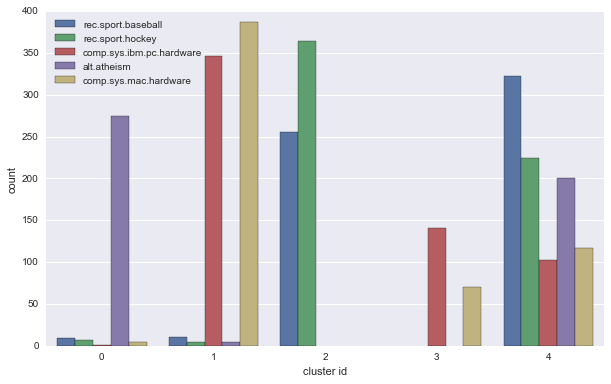

In [163]:
# Step 1
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Step 2
kmeans_pca = KMeans(n_clusters=5, random_state=1337)  
kmeans_pca.fit(X_2d)
print("adjusted rand score: {}".format(adjusted_rand_score(y, kmeans_pca.labels_)))

# Step 3
print("\nNumber of Datapoints per Cluster:\n")
print(pd.value_counts(kmeans_pca.labels_))
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.show()

4. Comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?
    * If you compare this graph with the graph in question 1.6, you will see that they are relatively similar. Meaning that with pca transform with 2 principal components, did nor perform better than kmeans without pca transformation. The adjusted rand score only increased from 0.21610 to 0.268079.

<span style="color:red"> It is giving us slightly better performance as observed from AdjustedRandIndex. We now have 3 large clusters and two small. Before we had one large and 4 of a more similar size. The purity of most clusters is better i.e. the spread of labels in each cluster is less uniform The distinction between hockey and baseball seems better, but the distinction between ibm and mac is roughly similar if not a little worst.</span>

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [164]:
cats = ['alt.atheism', 'comp.sys.mac.hardware', 'rec.sport.hockey', 
        'comp.sys.ibm.pc.hardware', 'rec.sport.baseball']
labels_interp = np.array(cats)[kmeans_pca.labels_]

<span style="color:red">Good. </span>

### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

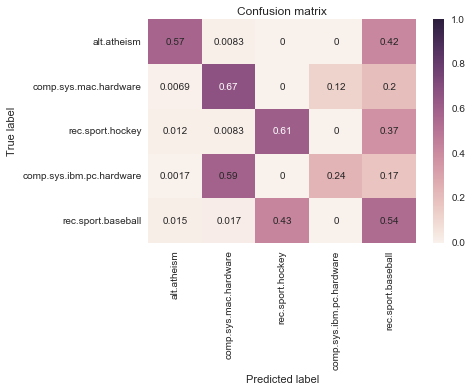

In [165]:
# Function taken from Lab 2
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute the resulting confusion matrix
cm = confusion_matrix(y, labels_interp, labels=cats)

# Normalize the confusion matrix
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=cats)

<span style="color:red">Good. </span>

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

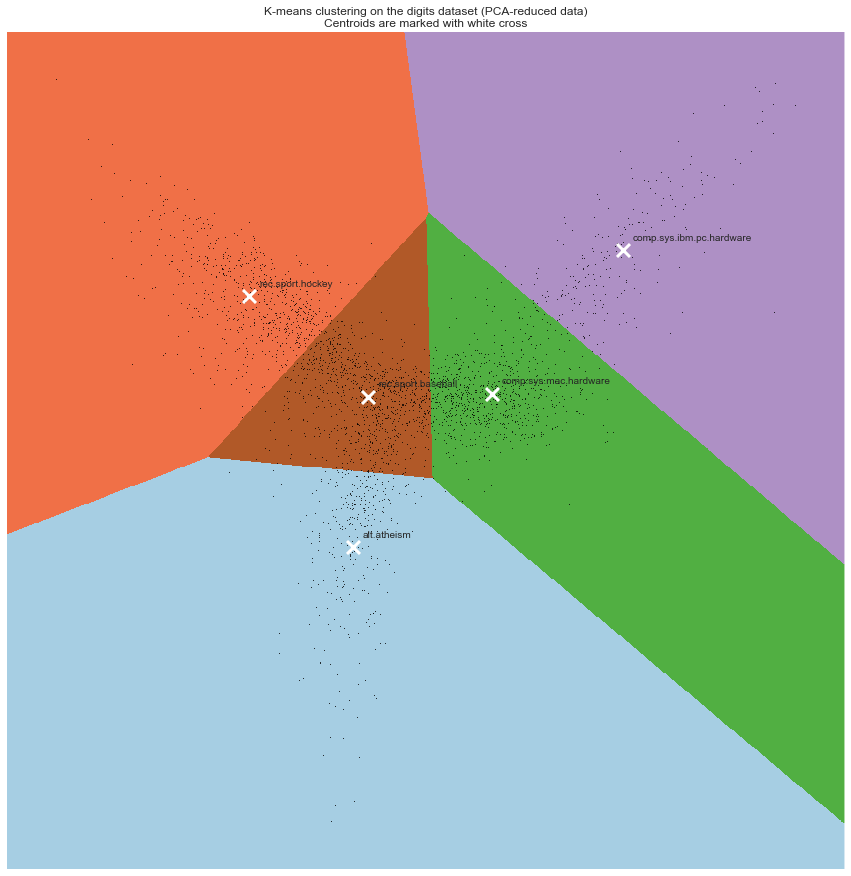

In [201]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .05, X_2d[:, 0].max() + .05
y_min, y_max = X_2d[:, 1].min() - .05, X_2d[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
fig, ax = plt.subplots(figsize=(15,15))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

# Label Centroids
for centroid, label in zip(centroids,cats): 
    plt.annotate(label, xy=centroid, xytext=(centroid[0]+.01,centroid[1]+.01))

# Plot Axes and Title
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

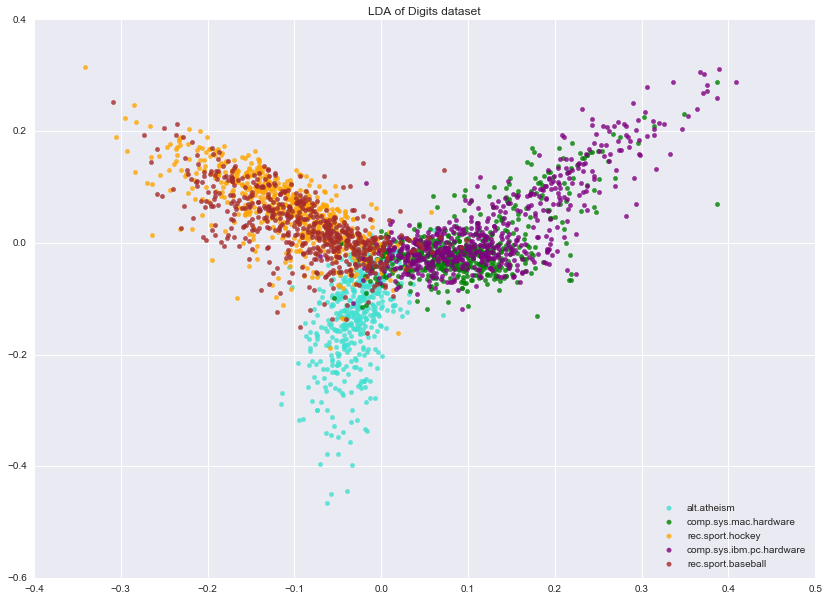

In [167]:
colors = ['turquoise', 'green', 'orange', 'purple', 'brown' ]
target_names = ['alt.atheism', 'comp.sys.mac.hardware', 'rec.sport.hockey', 
        'comp.sys.ibm.pc.hardware', 'rec.sport.baseball']

plt.figure(figsize=(14,10))
for color, target_name in zip(colors, target_names):
    plt.scatter(X_2d[y == target_name, 0], X_2d[y == target_name, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc=4, shadow=False, scatterpoints=1)
plt.title('LDA of Digits dataset')

plt.show()

<span style="color:red">For better visualization, you can also plot different cluster instances on a separate graph.
 </span>

### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

1. Is the kmeans algorithm deterministic?
    * No it's not. Kmeans converges on a local minimum depending on your starting points. So different starting points means very different results.
    
2. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
    * Yes, the sklearn implementation of kmeans uses the kmeans++ algorithm to selection optimal cluster centers by specifying a procedure to initialize the cluster centers before proceeding with the standard k-means optimization iterations. With the k-means++ initialization, the algorithm is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution. The algorithm first chooses one center uniformly at random from among the data points. Then, for each data point x, compute D(x), the distance between x and the nearest center that has already been chosen. Then it chooses one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2. It repeats this process until k centers have been chosen.
    
3. The default method for initialising centres in the sklearn implementation is kmeans++. Name another method for initialising and a problem with it.
   * Before kmeans++, Lloyd's algorithm, but had 2 main problems: First, it has been shown that the worst case running time of the algorithm is super-polynomial in the input size. Second, the approximation found can be arbitrarily bad with respect to the objective function compared to the optimal clustering.


<span style="color:red">Good. 3. Random initialization can also be used.</span>

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [168]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [169]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [170]:
# Use the pandas describe method on the data to get a feel for the range of each dimension
data = pd.DataFrame(digits['data'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [171]:
# Print the max/min values for each dimension
for i in range(64):
    print("dim: {}   max: {}   min: {}".format(i, data.max(axis=0)[i], data.min(axis=0)[i]))

dim: 0   max: 0.0   min: 0.0
dim: 1   max: 8.0   min: 0.0
dim: 2   max: 16.0   min: 0.0
dim: 3   max: 16.0   min: 0.0
dim: 4   max: 16.0   min: 0.0
dim: 5   max: 16.0   min: 0.0
dim: 6   max: 16.0   min: 0.0
dim: 7   max: 15.0   min: 0.0
dim: 8   max: 2.0   min: 0.0
dim: 9   max: 16.0   min: 0.0
dim: 10   max: 16.0   min: 0.0
dim: 11   max: 16.0   min: 0.0
dim: 12   max: 16.0   min: 0.0
dim: 13   max: 16.0   min: 0.0
dim: 14   max: 16.0   min: 0.0
dim: 15   max: 12.0   min: 0.0
dim: 16   max: 2.0   min: 0.0
dim: 17   max: 16.0   min: 0.0
dim: 18   max: 16.0   min: 0.0
dim: 19   max: 16.0   min: 0.0
dim: 20   max: 16.0   min: 0.0
dim: 21   max: 16.0   min: 0.0
dim: 22   max: 16.0   min: 0.0
dim: 23   max: 8.0   min: 0.0
dim: 24   max: 1.0   min: 0.0
dim: 25   max: 15.0   min: 0.0
dim: 26   max: 16.0   min: 0.0
dim: 27   max: 16.0   min: 0.0
dim: 28   max: 16.0   min: 0.0
dim: 29   max: 16.0   min: 0.0
dim: 30   max: 15.0   min: 0.0
dim: 31   max: 1.0   min: 0.0
dim: 32   max: 0.0   min:

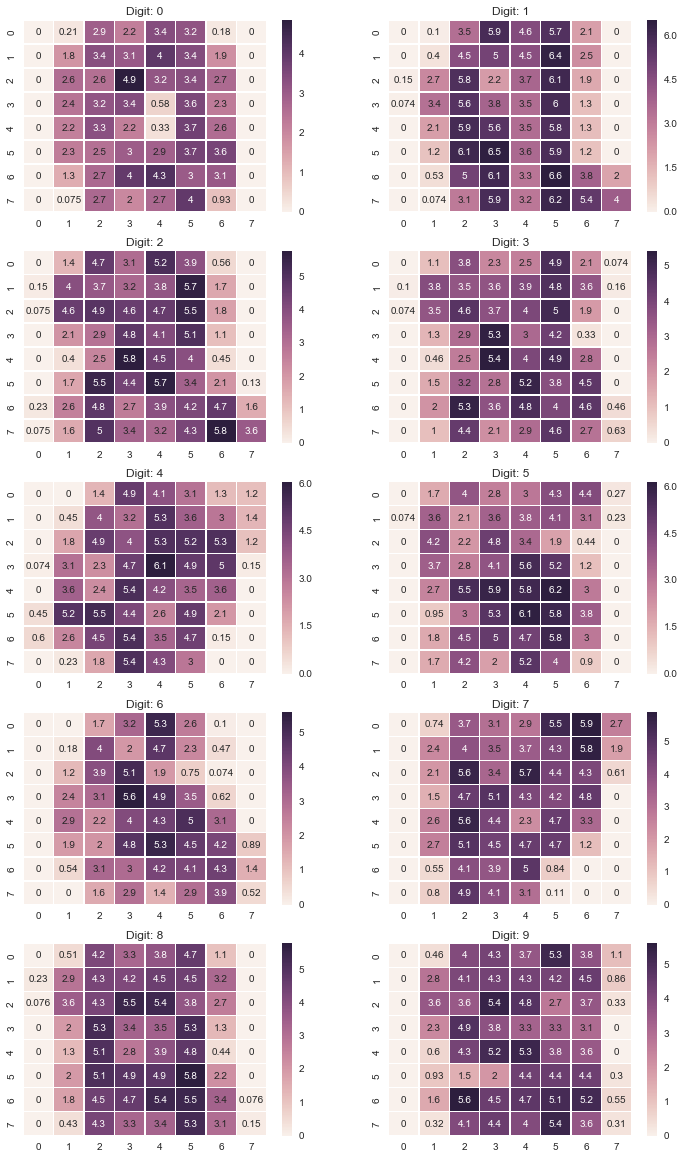

In [172]:
digit_stds = data.groupby(digits.target).std().as_matrix()

x = [np.zeros([8,8]) for _ in range(10)]
nums = np.dstack(x)
nums = np.rollaxis(nums,-1)

for i in range(10):
    nums[i] = digit_stds[i].reshape((8,8))

fig,axn = plt.subplots(5, 2, figsize=(12,20))

for ax,i in zip(axn.flat, range(10)):
    sns.heatmap(nums[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Digit: {}".format(i))

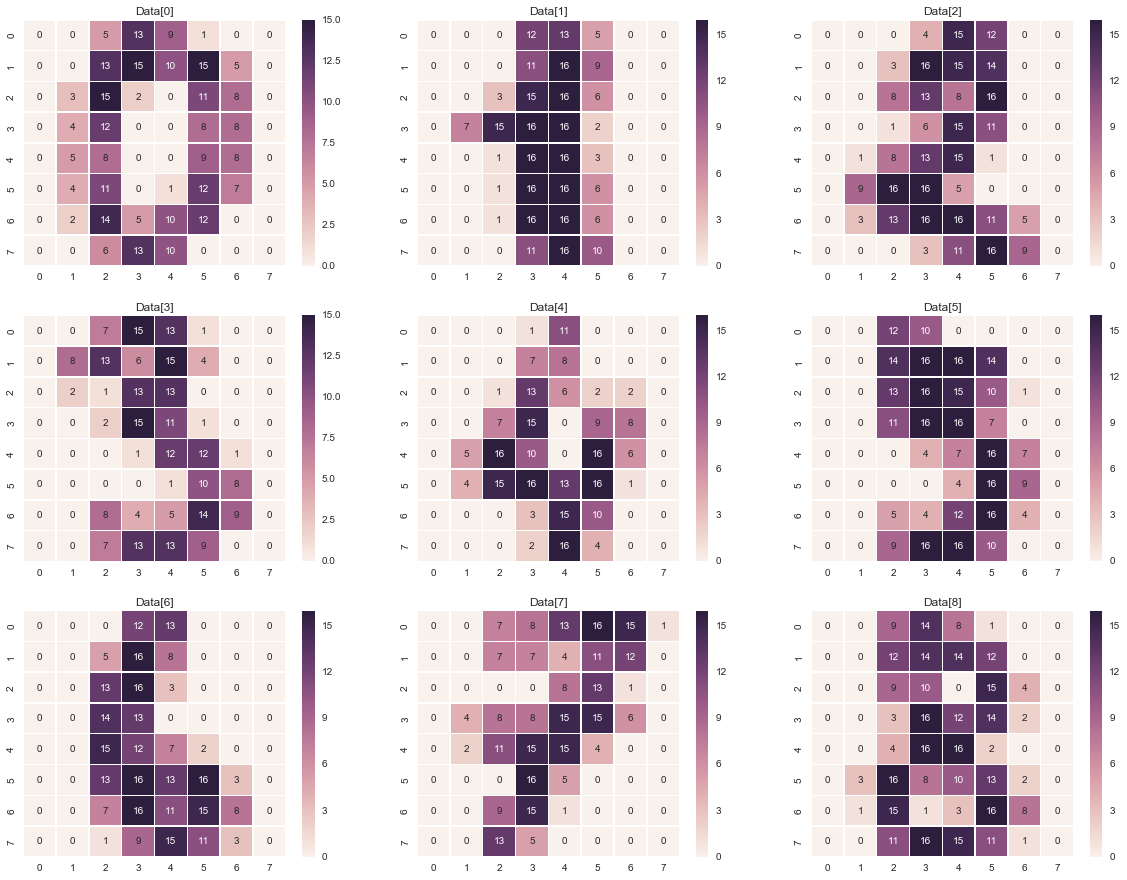

In [173]:
# Use sns.heatmap() to plot the first 9 digits in the dataset
x = [np.zeros([8,8]) for _ in range(9)]
nums = np.dstack(x)
nums = np.rollaxis(nums,-1)

for i in range(9):
    nums[i] = data.iloc[i].reshape((8,8))

fig,axn = plt.subplots(3, 3, figsize=(20,15))

for ax,i in zip(axn.flat, range(9)):
    sns.heatmap(nums[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Data[{}]".format(i))

No, not all of the dimensions are going to be useful. As all of the heatmaps show, the edges (dimension 0) are essentially useless. This makes sense because on almost all of the digit images, the edges will be white space with no markings.

<span style="color:red">Aggregate standard deviation heatmap not shown. </span>

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

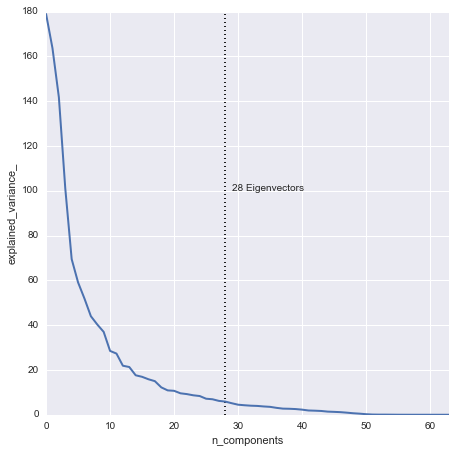

In [174]:
n_components = digits.data.shape[1]
pca = PCA(n_components=digits.data.shape[1])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

# find 95% variance
total_variance = sum(pca.explained_variance_)
cumulative_explained_variance = 0.0
for i in range(len(pca.explained_variance_)):
    cumulative_explained_variance += pca.explained_variance_[i]
    if cumulative_explained_variance / total_variance > .95:
        variance_point = i;
        break;

pca.fit(X_digits)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.vlines(variance_point, 0, 180, linestyle="dotted")
plt.annotate("28 Eigenvectors", xy=(29,100))
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


The majority of the data can be explained with relatively few eigen vectors/principal components, as shown by the graph. We only need 28 eigen vectors to capture 95% of the variance in the data.

<span style="color:red">A total of 29 eigen vectors cover 95% variance, given graph is indexed from 0.


### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

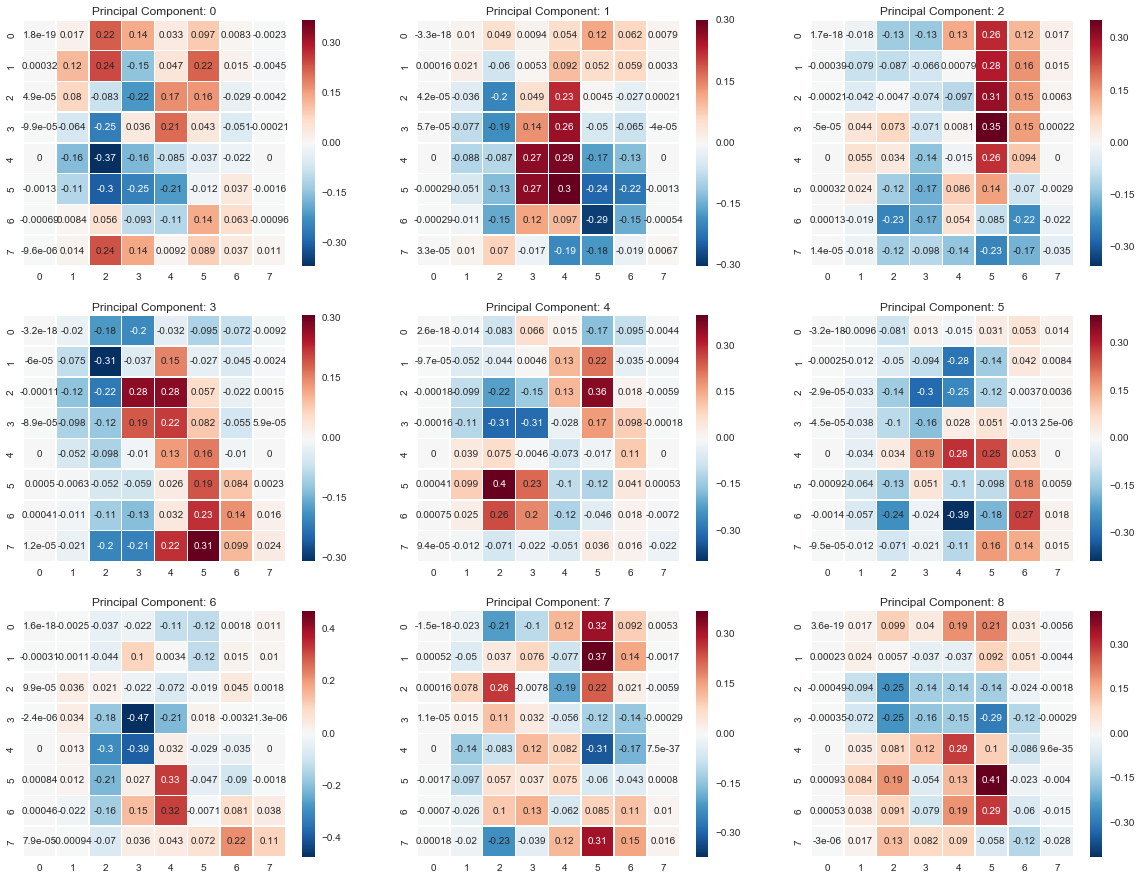

In [175]:
x = [np.zeros([8,8]) for _ in range(9)]
pcs = np.dstack(x)
pcs = np.rollaxis(pcs,-1)

for i in range(9):
    pcs[i] = pca.components_[i].reshape((8,8))

fig,axn = plt.subplots(3, 3, figsize=(20,15))

for ax,i in zip(axn.flat, range(9)):
    sns.heatmap(pcs[i], ax=ax, annot=True, linewidths=.5)
    ax.set_title("Principal Component: {}".format(i))


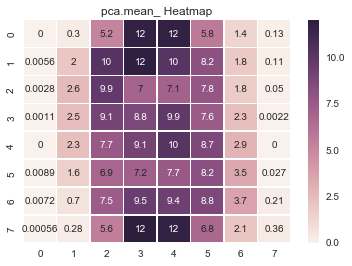

In [176]:
mean = pca.mean_.reshape((8,8))
ax = sns.heatmap(mean, annot=True, linewidths=.5)
ax.set_title('pca.mean_ Heatmap')


<span style="color:red">Good. </span>

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

In [177]:
# Reconsruct with Principal Components
coefficients = pca.transform(digits.data[0,:].reshape(1, -1)).flatten()
idx=[1,2,5]

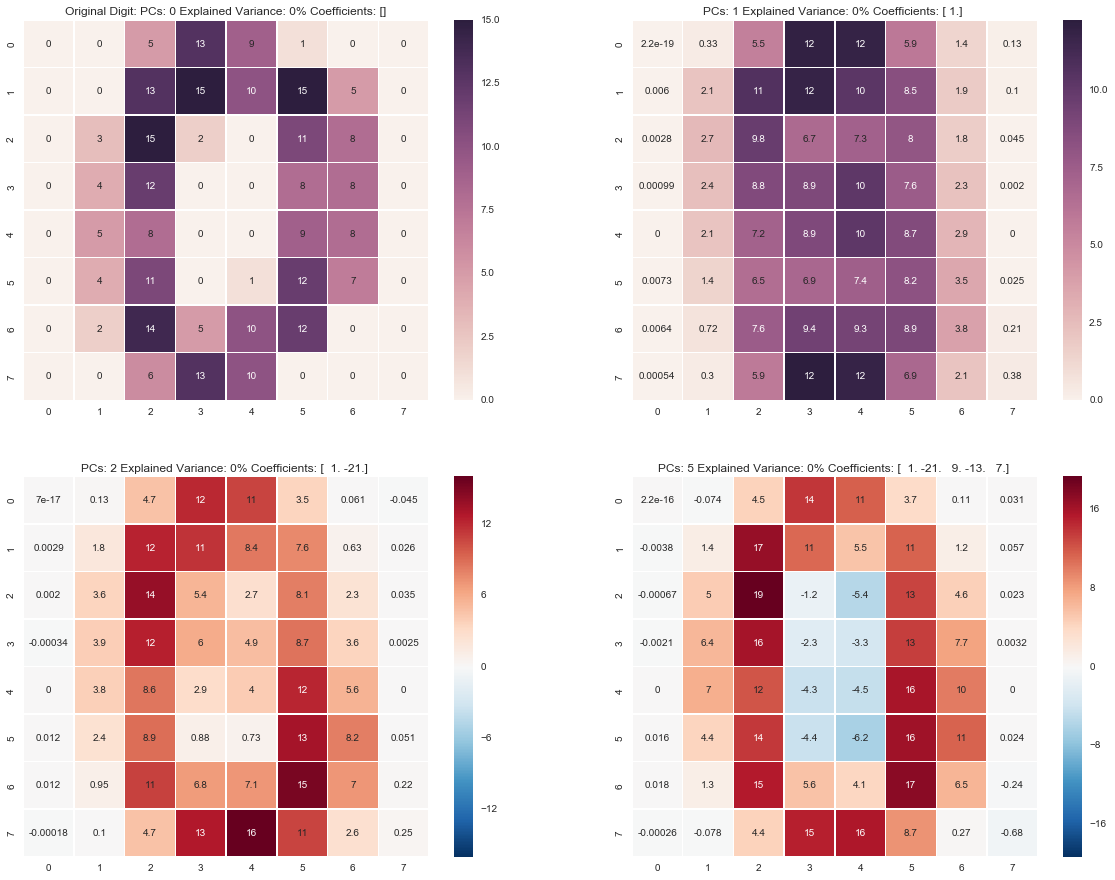

In [178]:
x = [np.zeros([8,8]) for _ in range(4)]
new_digits = np.dstack(x)
new_digits = np.rollaxis(new_digits,-1)
new_digits[0] = data.iloc[0].reshape((8,8)) # Original Digit
percents = np.zeros([3,1])

for i in range(1,4):
    new_digit = pca.mean_
    for c in range(idx[i-1]):
        new_digit += coefficients[c]*pca.components_[c]
    new_digits[i] = new_digit.reshape((8,8))
    percents[i-1] = sum(pca.explained_variance_[0:idx[i-1]])/sum(pca.explained_variance_) 
    

# Plot
fig,axn = plt.subplots(2, 2, figsize=(20,15))

for ax,i in zip(axn.flat, range(4)):
    sns.heatmap(new_digits[i], ax=ax, annot=True, linewidths=.5)
    if (i==0):
        ax.set_title("Original Digit: PCs: 0 Explained Variance: 0% Coefficients: []")
    else:
        pc = idx[i-1]
        coeffs = np.zeros(pc)
        for j in range(pc):
            coeffs[j] = int(coefficients[j])
        ax.set_title("PCs: {} Explained Variance: {}% Coefficients: {} ".format(pc, int(1*percents[i-1]), coeffs))



Yes they do! As seen with the faces example in the lecture videos/slides, the more principal components(times the coefficents of the digit you are reconstructing) you add to the mean, the more it looks like the original digit!

<span style="color:red">Explained variance is incorrect. Also, note that some of the values are negative: the domain of the data is restricted to positive values, so this data is unrealistic in this respect.
</span>

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [198]:
# get data
digit_data = digits.data
transformed_digit_data = pca.fit_transform(digits.data)

# fit 4 models
svc1 = SVC(kernel="linear", shrinking=False, random_state=1337)
svc2 = SVC(kernel="linear", shrinking=False, random_state=1337)
gnb1 = GaussianNB()
gnb2 = GaussianNB()

names = ['SVC on digit data', 'SVC on transformed digit data', 'GNB on digit data', 'GNB on transformed digit data']
classifiers = [svc1, svc2, gnb1, gnb2]
all_data = [digit_data, transformed_digit_data, digit_data, transformed_digit_data]

# 5 fold cross validation
means = np.zeros((4,5))

n = digit_data.shape[0]
kf = KFold(n, n_folds=5, shuffle=True, random_state=1337)

for clf, data, i in zip(classifiers, all_data, range(4)):
    j = 0
    for train_index, test_index in kf:
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = digits.target[train_index], digits.target[test_index]
        clf.fit(X_train, y_train)
        means[i][j] = clf.score(X_test, y_test)
        j+=1

for c in range(means.shape[0]):
    print("\nClassifier: {}".format(names[c]))
    print("Mean Score: {}".format(np.mean(means[c,:])))

5

Classifier: SVC on digit data
Mean Score: 0.973837821108
5

Classifier: SVC on transformed digit data
Mean Score: 0.973837821108
5

Classifier: GNB on digit data
Mean Score: 0.845312596719
5

Classifier: GNB on transformed digit data
Mean Score: 0.889801918911


As the results show, the GNB classifier improved on the transformed data while the SVC did not! With PCA, the dimensions becomes less correlated and more "independent". Because the Gaussian Naive Bayes independence assumption already assumes that the dimensions are independent it makes sense that it performs better on data that has less correlated/"independent" dimensions.

<span style="color:red">Good. </span>